In [225]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division, absolute_import, print_function

from fastText import train_unsupervised
from fastText import load_model
import os
import gensim, logging
from gensim.scripts.glove2word2vec import glove2word2vec
import errno
from glove import Corpus, Glove
from datetime import datetime
import sys
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.rcParams['text.latex.preamble'] = [
    '\\usepackage{amsfonts}'
]

In [262]:
model = gensim.models.KeyedVectors.load_word2vec_format("trained/fasttext_fashion_dim300_c2_skipgram.vec", binary=False)
#model = gensim.models.KeyedVectors.load_word2vec_format("trained/glove_fashion_dim300_c3_-.vec", binary=False)
#model = gensim.models.KeyedVectors.load_word2vec_format("trained/fasttext_fashion_dim300_c10_cbow.vec", binary=False)
#model = gensim.models.KeyedVectors.load_word2vec_format("trained/word2vec_fashion_dim300_c3_1.vec", binary=False)

In [120]:
def my_vector_getter(words, word, my_coordinates):
    index = words.index(word)
    word_array = my_coordinates[index].ravel()
    return (word_array)

In [187]:
def plot_concept1(model, names, colors, below, camel, above, muslim, berlin):
    pc_x = 0
    pc_y = 1
    words = model.vocab.keys()
    word_vectors = []
    for elt in words:
        word_vectors.append(model[elt].tolist())
    my_pca = PCA(n_components=10)
    new_coordinates = my_pca.fit_transform(np.array(word_vectors))
    new_coordinates.shape
    my_vectors = []
    for name in names:
        my_vectors.append(my_vector_getter(words, name, new_coordinates))

    dim_1_coords = [element[pc_x] for element in my_vectors]
    dim_2_coords = [element[pc_y] for element in my_vectors]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    #'ro'
    plt.scatter(dim_1_coords, dim_2_coords, c=colors)
    names = map(lambda x: x.replace("#", "\#"), names) #for latex
    below = map(lambda x: x.replace("#", "\#"), below) #for latex
    camel = map(lambda x: x.replace("#", "\#"), camel) #for latex
    above = map(lambda x: x.replace("#", "\#"), above) #for latex
    berlin = map(lambda x: x.replace("#", "\#"), berlin) #for latex
    muslim = map(lambda x: x.replace("#", "\#"), muslim) #for latex
    for x, y, name in zip(dim_1_coords , dim_2_coords, names):
        if name in below:
            ax.annotate(name, xy=((x-0.05), (y-0.06)), fontsize=10)
        if name in above:
            ax.annotate(name, xy=((x), (y+0.03)), fontsize=10)
        if name in camel:
            ax.annotate(name, xy=((x+0.02), (y-0.04)), fontsize=10)
        if name in berlin:
            ax.annotate(name, xy=((x+0.03), (y)), fontsize=10)
        if name in muslim:
            ax.annotate(name, xy=((x-0.25), (y+0.04)), fontsize=10)
        if not name in below and name not in above and name not in camel and name not in muslim and name not in berlin:
            ax.annotate(name, xy=(x, y), fontsize=10)
    plt.ylabel('Dimension 2')
    plt.xlabel('Dimension 1')
    plt.title('A sample of word vectors reduced to $\mathbb{R}^2$')
    plt.grid()
    plt.savefig('figures/word_plot_berlin.eps', format='eps', dpi=1000)
    plt.show()

In [188]:
def plot_concept2(model, names, colors, below, above, adidas):
    pc_x = 0
    pc_y = 1
    words = model.vocab.keys()
    word_vectors = []
    for elt in words:
        word_vectors.append(model[elt].tolist())
    my_pca = PCA(n_components=10)
    new_coordinates = my_pca.fit_transform(np.array(word_vectors))
    new_coordinates.shape
    my_vectors = []
    for name in names:
        my_vectors.append(my_vector_getter(words, name, new_coordinates))

    dim_1_coords = [element[pc_x] for element in my_vectors]
    dim_2_coords = [element[pc_y] for element in my_vectors]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    #'ro'
    plt.scatter(dim_1_coords, dim_2_coords, c=colors)
    names = map(lambda x: x.replace("#", "\#"), names) #for latex
    below = map(lambda x: x.replace("#", "\#"), below) #for latex
    above = map(lambda x: x.replace("#", "\#"), above) #for latex
    adidas = map(lambda x: x.replace("#", "\#"), adidas) #for latex
    for x, y, name in zip(dim_1_coords , dim_2_coords, names):
        if name in below:
            ax.annotate(name, xy=((x-0.05), (y-0.035)), fontsize=10)
        if name in above:
            ax.annotate(name, xy=((x-0.05), (y+0.02)), fontsize=10)
        if name in adidas:
            ax.annotate(name, xy=((x+0.009), (y+0.02)), fontsize=10)
        if not name in below and name not in above and name not in adidas:
            ax.annotate(name, xy=(x, y), fontsize=10)
    plt.ylabel('Dimension 2')
    plt.xlabel('Dimension 1')
    plt.title('A sample of word vectors reduced to $\mathbb{R}^2$')
    plt.grid()
    plt.savefig('figures/word_plot_budget.eps', format='eps', dpi=1000)
    plt.show()

In [189]:
def plot_concept3(model, names, colors, below, above, arrows):
    pc_x = 0
    pc_y = 1
    words = model.vocab.keys()
    word_vectors = []
    for elt in words:
        word_vectors.append(model[elt].tolist())
    my_pca = PCA(n_components=10)
    new_coordinates = my_pca.fit_transform(np.array(word_vectors))
    new_coordinates.shape
    my_vectors = []
    for name in names:
        my_vectors.append(my_vector_getter(words, name, new_coordinates))

    dim_1_coords = [element[pc_x] for element in my_vectors]
    dim_2_coords = [element[pc_y] for element in my_vectors]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    #'ro'
    plt.scatter(dim_1_coords, dim_2_coords, c=colors)
    names = map(lambda x: x.replace("#", "\#"), names) #for latex
    below = map(lambda x: x.replace("#", "\#"), below) #for latex
    above = map(lambda x: x.replace("#", "\#"), above) #for latex
    for x, y, name in zip(dim_1_coords , dim_2_coords, names):
        if name in below:
            ax.annotate(name, xy=((x-0.02), (y-0.035)), fontsize=10)
        if name in above:
            ax.annotate(name, xy=((x-0.036), (y+0.016)), fontsize=10)
        if not name in below and name not in above:
            ax.annotate(name, xy=(x, y), fontsize=10)
        if name in arrows:
            target = arrows[name]
            for x2, y2, name2 in zip(dim_1_coords , dim_2_coords, names):
                if name2 == target:
                    ax.arrow(x, y, (x2-(x+0.02)), (y2-(y+0.02)), head_width=0.015, head_length=0.01, linewidth=0.35,fc='k', ec='k', fill=False)
            
    plt.ylabel('Dimension 2')
    plt.xlabel('Dimension 1')
    plt.title('A sample of word vectors reduced to $\mathbb{R}^2$')
    plt.grid()
    plt.savefig('figures/word_plot_arrows.eps', format='eps', dpi=1000)
    plt.show()

In [190]:
#"#greycoat"
#"#camidress"
berlin_kaftan = ["#berlinfashion", "#camidress","#straightlegjeans", "#camelscarf", "#coat", "#muslimwear", "#kaftanfashion", "#embroidertunic", "#embroiderykaftan"]
berlin_kaftan_colors = ["green", "green", "green", "green", "green", "red", "red", "red", "red"]
berlin_below = ["#embroiderykaftan", "#camidress"]
berlin_camel = ["#camelscarf"]
berlin_above = ["#coat", "#kaftanfashion", "#embroidertunic"]
berlin_muslim = ["#muslimwear"]
berlin_berlin =  ["#berlinfashion", "#straightlegjeans"]
#"#charleshenry",
budget_expensive = ["#budgetstyle", "prada", "gucci", "armani", "dior", "#leithclothing", "#adidaslove", "#charleshenry"]
budget_expensive_colors = ["green", "red", "red", "red", "red", "green", "green", "green"]
budget_below=["#leithclothing", "#charleshenry"]
budget_above=["prada", "dior", "armani", "gucci"]
budget_adidas=["#adidaslove", "#budgetstyle"]

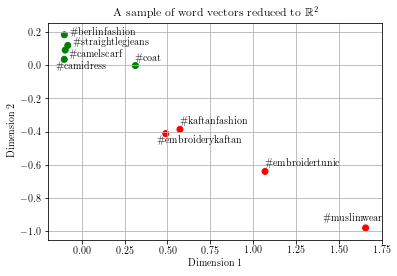

In [191]:
plot_concept1(model, berlin_kaftan, berlin_kaftan_colors, berlin_below, berlin_camel, berlin_above, berlin_muslim, berlin_berlin)

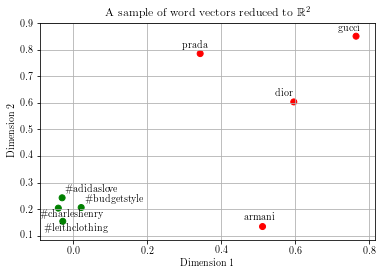

In [192]:
plot_concept2(model, budget_expensive, budget_expensive_colors, budget_below, budget_above, budget_adidas)

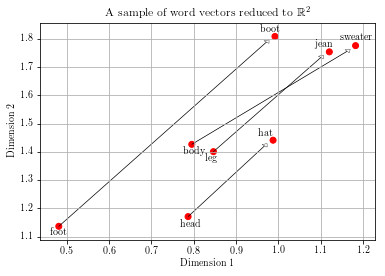

In [193]:
body_parts = ["foot", "head", "body", "leg", "jean", "hat", "boot", "sweater"]
colors = ["red", "red", "red", "red", "red", "red", "red"]
arrows = {"body": "sweater", "leg": "jean", "foot":"boot", "head": "hat", }
plot_concept3(model, body_parts, colors, ["foot", "head", "body", "leg"], ["boot", "sweater", "jean", "hat"], arrows)

In [263]:
print("dress:\n{0}".format(model.most_similar(u'dress')))
print("jacket:\n{0}".format(model.most_similar(u'jacket')))
print("shoe:\n{0}".format(model.most_similar(u'shoe')))
print("jean:\n{0}".format(model.most_similar(u'jean')))
print("shirt:\n{0}".format(model.most_similar(u'shirt')))
print("blouse:\n{0}".format(model.most_similar(u'blouse')))
print("hat:\n{0}".format(model.most_similar(u'hat')))
print("chic:\n{0}".format(model.most_similar(u'chic')))
print("vintage:\n{0}".format(model.most_similar(u'vintage')))
print("bohemian:\n{0}".format(model.most_similar(u'bohemian')))
print("sexy:\n{0}".format(model.most_similar(u'sexy')))
print("casual:\n{0}".format(model.most_similar(u'casual')))
print("punk:\n{0}".format(model.most_similar(u'punk')))
print("hipster:\n{0}".format(model.most_similar(u'hipster')))
print("exotic:\n{0}".format(model.most_similar(u'exotic')))
print("trendy:\n{0}".format(model.most_similar(u'trendy')))
print("bag:\n{0}".format(model.most_similar(u'bag')))
print("glasses:\n{0}".format(model.most_similar(u'glasses')))
print("trouser:\n{0}".format(model.most_similar(u'trouser')))
print("tunic:\n{0}".format(model.most_similar(u'tunic')))
print("denim:\n{0}".format(model.most_similar(u'denim')))
print("leather:\n{0}".format(model.most_similar(u'leather')))
print("cashmere:\n{0}".format(model.most_similar(u'cashmere')))
print("gucci:\n{0}".format(model.most_similar(u'gucci')))
print("prada:\n{0}".format(model.most_similar(u'prada')))
print("nike:\n{0}".format(model.most_similar(u'nike')))
print("elegant:\n{0}".format(model.most_similar(u'elegant')))
print("cowgirl:\n{0}".format(model.most_similar(u'cowgirl')))
print("business:\n{0}".format(model.most_similar(u'business')))
print("kimono:\n{0}".format(model.most_similar(u'kimono')))
print("zalando:\n{0}".format(model.most_similar(u'zalando')))
print("scarf:\n{0}".format(model.most_similar(u'scarf')))
print("collar:\n{0}".format(model.most_similar(u'collar')))
print("hoodie:\n{0}".format(model.most_similar(u'hoodie', topn=20)))
print("trench:\n{0}".format(model.most_similar(u'trench')))
print("collection:\n{0}".format(model.most_similar(u'collection')))
print("garment:\n{0}".format(model.most_similar(u'garment')))
print("#ootd:\n{0}".format(model.most_similar(u'#ootd')))
print("#gucci:\n{0}".format(model.most_similar(u'#gucci', topn=50)))
print("#fashion:\n{0}".format(model.most_similar(u'#fashion')))
print("loungewear:\n{0}".format(model.most_similar(u'loungewear',topn=20)))
print("buttonhole:\n{0}".format(model.most_similar(u'buttonhole')))
print("vogue:\n{0}".format(model.most_similar(u'vogue',topn=20)))
print("gaiter:\n{0}".format(model.most_similar(u'gaiter')))
print("bun:\n{0}".format(model.most_similar(u'bun')))
print("#instafashion:\n{0}".format(model.most_similar(u'#instafashion')))
print("#holidaystyle:\n{0}".format(model.most_similar(u'#holidaystyle')))
print("#gapstyle:\n{0}".format(model.most_similar(u'#gapstyle',topn=20)))
print("#chic:\n{0}".format(model.most_similar(u'#chic')))
print("#falltrends:\n{0}".format(model.most_similar(u'#falltrends',topn=20)))
print("fall:\n{0}".format(model.most_similar(u'fall')))
print("#fallstyle:\n{0}".format(model.most_similar(u'#fallstyle',topn=20)))
print("#summertrends:\n{0}".format(model.most_similar(u'#summertrends')))
print("summer:\n{0}".format(model.most_similar(u'summer')))
print("#summerstyle:\n{0}".format(model.most_similar(u'#summerstyle')))
print("#summerfashion:\n{0}".format(model.most_similar(u'#summerfashion')))
print("#shoestagram:\n{0}".format(model.most_similar(u'#shoestagram',topn=20)))
print("#gucci:\n{0}".format(model.most_similar(u'#gucci',topn=20)))
print("#springstyle:\n{0}".format(model.most_similar(u'#springstyle')))
print("#springfashion:\n{0}".format(model.most_similar(u'#springfashion')))
print("#winterfashion:\n{0}".format(model.most_similar(u'#winterfashion')))
print("#bohemian:\n{0}".format(model.most_similar(u'#bohemian',topn=20)))
print("#swag:\n{0}".format(model.most_similar(u'#swag',topn=20)))
print("#muslimwear:\n{0}".format(model.most_similar(u'#muslimwear', topn=20)))
print("#beyonce:\n{0}".format(model.most_similar(u'#beyonce', topn=20)))
print("#gymwear:\n{0}".format(model.most_similar(u'#gymwear', topn=20)))
print("#hijabfashion:\n{0}".format(model.most_similar(u'#hijabfashion', topn=20)))
print("#vintagestyle:\n{0}".format(model.most_similar(u'#vintagestyle', topn=50)))
print("#indianfashion:\n{0}".format(model.most_similar(u'#indianfashion', topn=50)))
print("#bohemian:\n{0}".format(model.most_similar(u'#bohemian',topn=50)))
print("#60s:\n{0}".format(model.most_similar(u'#60s', topn=20)))
print("#70s:\n{0}".format(model.most_similar(u'#70s', topn=20)))
print("#80s:\n{0}".format(model.most_similar(u'#80s', topn=20)))
print("#90s:\n{0}".format(model.most_similar(u'#90s', topn=20)))
print("#beachstyle:\n{0}".format(model.most_similar(u'#beachstyle', topn=20)))
print("#australianfashion:\n{0}".format(model.most_similar(u'#australianfashion', topn=20)))
print("#americanfashion:\n{0}".format(model.most_similar(u'#americanfashion', topn=20)))
print("#berlinfashion:\n{0}".format(model.most_similar(u'#berlinfashion', topn=20)))
print("#19thcenturyfashion:\n{0}".format(model.most_similar(u'#19thcenturyfashion', topn=20)))
print("#americanstreetstyle:\n{0}".format(model.most_similar(u'#americanstreetstyle', topn=20)))
print("#citystyle:\n{0}".format(model.most_similar(u'#citystyle', topn=20)))
print("#streetstyle:\n{0}".format(model.most_similar(u'#streetstyle', topn=20)))
print("#torontostreetstyle:\n{0}".format(model.most_similar(u'#torontostreetstyle', topn=20)))
print("#poolstyle:\n{0}".format(model.most_similar(u'#poolstyle', topn=20)))
print("#budgetstyle:\n{0}".format(model.most_similar(u'#budgetstyle', topn=40)))
print("#poolstyle:\n{0}".format(model.most_similar(u'#poolstyle', topn=40)))
print("#winterstyle:\n{0}".format(model.most_similar(u'#winterstyle', topn=40)))
print("#torontostreetstyle:\n{0}".format(model.most_similar(u'#torontostreetstyle', topn=20)))
print("#70sretrofashion:\n{0}".format(model.most_similar(u'#70sretrofashion', topn=20)))
print("#luxurylifestyle:\n{0}".format(model.most_similar(u'#luxurylifestyle', topn=20)))
print("#expensive:\n{0}".format(model.most_similar(u'#expensive', topn=20)))
print("#mensfashion:\n{0}".format(model.most_similar(u'#mensfashion', topn=40)))
print("#womensfashion:\n{0}".format(model.most_similar(u'#womensfashion', topn=40)))

dress:
[(u'maxi', 0.6064591407775879), (u'skirt', 0.5887166261672974), (u'dressescasual', 0.5563435554504395), (u'dressn', 0.5530357956886292), (u'stunning', 0.5347995758056641), (u'dresd', 0.5213741064071655), (u'4dress', 0.5145495533943176), (u'romper', 0.5144822597503662), (u'prettyb', 0.5105811357498169), (u'4dresses17', 0.5092255473136902)]
jacket:
[(u'coat', 0.6695156097412109), (u'bomber', 0.6677146553993225), (u'jacketa', 0.6558184623718262), (u'jackett', 0.6105397343635559), (u'jackettt', 0.5853245258331299), (u'jacker', 0.5697096586227417), (u'jackeeet', 0.5595415830612183), (u'blazer', 0.5584977269172668), (u'jackes', 0.5416020154953003), (u"jacket's", 0.5404192209243774)]
shoe:
[(u'shoees', 0.567099392414093), (u'boot', 0.5562083125114441), (u'shoez', 0.5529545545578003), (u'shoes', 0.5358626842498779), (u'code-shoes', 0.5318393707275391), (u'jfwleo', 0.5314986705780029), (u'jfwross', 0.5284287929534912), (u'jfwgobi', 0.5278133153915405), (u'those.shoes', 0.5267866849899292

elegant:
[(u'eleganti', 0.6283900737762451), (u'elegan', 0.626113772392273), (u'eleganz', 0.6028741598129272), (u'elegantly', 0.6018155217170715), (u'ellegant', 0.6005164980888367), (u'elegantand', 0.5991589426994324), (u'inelegant', 0.5963267087936401), (u'elegant.from', 0.5686562657356262), (u'elegantna', 0.5608471632003784), (u'elegantissima', 0.5607157945632935)]
cowgirl:
[(u'#cowgirl', 0.7036362886428833), (u'showgirl', 0.667022705078125), (u'#cowgirls', 0.6657941341400146), (u'#goglowgirl', 0.6011801958084106), (u'#cowgirldreams', 0.5748266577720642), (u'cwc', 0.4875354766845703), (u'cowgirlswithcurves.com/2017/10/22/original-cowgirl-clothing/', 0.47580432891845703), (u'#newgirl', 0.4513040781021118), (u'loggerodeo', 0.41937533020973206), (u'yeehaw', 0.4112301468849182)]
business:
[(u'busines', 0.763237714767456), (u'business.never', 0.6387286186218262), (u'businessmen', 0.6363494396209717), (u'bbcbusiness', 0.6156411170959473), (u'busin', 0.6033383011817932), (u'businessinsider'

#summertrends:
[(u'#summertrend', 0.9124388694763184), (u'summertrends', 0.8650744557380676), (u'#summertrendspic', 0.7516023516654968), (u'#bloggertrends', 0.7395378947257996), (u'#summertote', 0.7254105806350708), (u'#summertop', 0.7053091526031494), (u'#summertravel', 0.6901260614395142), (u'#wintertrends', 0.6715972423553467), (u'#summertops', 0.6705186367034912), (u'#colortrends', 0.6646233797073364)]
summer:
[(u'winter', 0.6881418228149414), (u'spring', 0.6416143178939819), (u'onlsummer', 0.5796208381652832), (u'4summer', 0.5649140477180481), (u'alyssum', 0.5450500249862671), (u'#_summer', 0.5185992121696472), (u'melange', 0.5044313073158264), (u'vmlaura', 0.49218255281448364), (u'meliert', 0.4894988536834717), (u'vmlua', 0.4876902103424072)]
#summerstyle:
[(u'#summerstyles', 0.8839808106422424), (u'#summerstylin', 0.8701931834220886), (u'#summerstyleguide', 0.7977292537689209), (u'zsummerstyle', 0.7664670944213867), (u'#summerstripes', 0.7603731751441956), (u'#sunmerstyle', 0.75

#americanfashion:
[(u'africanfashion', 0.8055433034896851), (u'#africanfashion', 0.7803747653961182), (u'#americanflag', 0.7730744481086731), (u'#africanfashionbloggers', 0.7185088396072388), (u'#americandream', 0.6860895156860352), (u'#americangirl', 0.6841418743133545), (u'#americanbrand', 0.682765781879425), (u'#americanrag', 0.6753621101379395), (u'#american_fashion', 0.6678674817085266), (u'#americanwolfinc', 0.6609232425689697), (u'#africanfashionpic', 0.659244179725647), (u'#americandays', 0.6579086184501648), (u'#africanfabric', 0.652665376663208), (u'#americanragcie', 0.6510114669799805), (u'#amercianfashion', 0.6464904546737671), (u'#americanastyle', 0.6455739140510559), (u'#americanretro', 0.6380621194839478), (u'#americanchristians', 0.6316243410110474), (u'taiwanfashion', 0.6199414730072021), (u'#manfashion', 0.617324948310852)]
#berlinfashion:
[(u'#berlinfashionweek', 0.8203420639038086), (u'#balkinfashion', 0.7288926243782043), (u'#bloglovinfashion', 0.6995315551757812),

#luxurylifestyle:
[(u'#luxurylife', 0.9049298167228699), (u'#luxurylifepic', 0.8246108293533325), (u'luxurylife', 0.7884048819541931), (u'#luxury_lifestyle', 0.7876921892166138), (u'#luxurylingerie', 0.761648416519165), (u'#luxuryliving', 0.7553435564041138), (u'#luxuryleather', 0.7503762245178223), (u'#luxurious-lifestyle', 0.6553895473480225), (u'#luxuryhats', 0.6451462507247925), (u'#vlifestyle', 0.6423749923706055), (u'luxuryliving', 0.6417246460914612), (u'beautifullifestyle', 0.6354250907897949), (u'#luxurybag', 0.6334025859832764), (u'#luxurydesign', 0.6257616281509399), (u'#22lifestyle', 0.617816686630249), (u'#luxuryretail', 0.6135783195495605), (u'#luxuryeyewear', 0.6100206971168518), (u'#luxurywatch', 0.6084699630737305), (u'#luxurygoods', 0.6076014041900635), (u'##lifestyle', 0.607260525226593)]
#expensive:
[(u'#expense', 0.8175541758537292), (u'#expert', 0.6855222582817078), (u'#exp', 0.6540677547454834), (u'least-expensive', 0.6484937071800232), (u'#expecting', 0.64649760

In [103]:
print("fur:\n{0}".format(model.most_similar(u'fur', topn=40)))

fur:
[(u'sarigianni', 0.8424332737922668), (u'trimpopular', 0.8237212896347046), (u'796.00', 0.7642877101898193), (u'#moftpic', 0.7376284003257751), (u'yudofsky', 0.7327350378036499), (u'#matchingtrends', 0.7172775268554688), (u'896', 0.7020261883735657), (u'faithless', 0.6658088564872742), (u'kopenhagen', 0.6530348658561707), (u'malahai', 0.6401828527450562), (u'hair-made', 0.6296836137771606), (u'faux', 0.6234787702560425), (u'gillet', 0.6140854358673096), (u'coyote', 0.6127244234085083), (u'giraffe-look', 0.600212574005127), (u'trimmed', 0.5960466861724854), (u'raccoon', 0.5626754760742188), (u'mouton', 0.5616705417633057), (u'5zero1', 0.5460542440414429), (u'kunstgeschichte', 0.5446176528930664), (u'mink', 0.5291319489479065), (u'#phstreetwear', 0.5195465087890625), (u'leather-based', 0.5115289688110352), (u'sh1003', 0.5110333561897278), (u'raviani', 0.5095272660255432), (u'r1000', 0.5055861473083496), (u'europen', 0.5049689412117004), (u'eji', 0.5036364793777466), (u'collar-female

In [104]:
print("denim:\n{0}".format(model.most_similar(u'denim', topn=40)))

denim:
[(u'w34', 0.892841100692749), (u'#retroverkclothing', 0.8559716939926147), (u'floral--oh', 0.8228176832199097), (u'#theteeshop', 0.8174464702606201), (u'higa', 0.7967067956924438), (u'rippe', 0.7842002511024475), (u'light-blue', 0.7699596881866455), (u'undoubtably', 0.7693831920623779), (u'dadhats', 0.7648698091506958), (u'bj216', 0.7549201846122742), (u'dark-blue', 0.7418142557144165), (u'hadron', 0.7074617147445679), (u'rilax', 0.6944878101348877), (u'dr.denim', 0.6929541230201721), (u'herrlicher', 0.6914714574813843), (u'#cityscenekc', 0.6768107414245605), (u'ltb', 0.6698933839797974), (u'#modelstatuspic', 0.6684210300445557), (u'pzi', 0.6535896062850952), (u'mavi', 0.649063766002655), (u'#acnestudio', 0.640520453453064), (u'2ndone', 0.6290107369422913), (u'#applewatchpic', 0.6276677846908569), (u'w\xe5ven', 0.6272674798965454), (u'bke', 0.6249097585678101), (u'zlz', 0.602798581123352), (u'jumpsuit-jeans', 0.6023381352424622), (u'denham', 0.5971954464912415), (u'edwin', 0.595

In [106]:
print("cotton:\n{0}".format(model.most_similar(u'cotton', topn=40)))

cotton:
[(u'a041', 0.8962517976760864), (u'#babygirlclothing', 0.8786815404891968), (u'ecoetsy', 0.8269434571266174), (u'long-sleev', 0.7906718254089355), (u't-sho', 0.7690469026565552), (u'ch198s', 0.740043044090271), (u'teamnaturalist', 0.7341431379318237), (u'#longskirtwraparound', 0.7316054105758667), (u'ya004', 0.7225277423858643), (u'#babygirlfashion', 0.7221816778182983), (u'ch101', 0.7107107043266296), (u'intercropping', 0.7008235454559326), (u'#boxpleated', 0.6988919973373413), (u't111', 0.6968838572502136), (u'ch198', 0.6959803104400635), (u'ya009', 0.690929651260376), (u'bazzar', 0.6881619691848755), (u'polyester-cotton', 0.6840693950653076), (u'comfor', 0.6778569221496582), (u'organiccottonclothing', 0.6677256226539612), (u'blen', 0.6640639901161194), (u'oneliner', 0.6599953174591064), (u'yb008', 0.6550186276435852), (u'galabiyya-the', 0.6455775499343872), (u'genmetric', 0.6433995366096497), (u'outerwearwl', 0.6299301981925964), (u'#sweaterweatherpic', 0.6266705393791199), 

In [286]:
print(model.wv.similarity("classic", "timeless"))
print(model.wv.similarity("classic", "romantic"))
print(model.wv.similarity("feminine", "romantic"))
print(model.wv.similarity("feminine", "charming"))
print(model.wv.similarity("feminine", "delicate"))
print(model.wv.similarity("sporty", "casual"))
print(model.wv.similarity("dramatic", "eccentric"))
print(model.wv.similarity("preppy", "classic"))

0.44094740659301584
0.2686466649525905
0.406992565502973
0.2754565900547977
0.32583062344023445
0.386405544139275
0.26791543890403363
0.3131786843573122


In [296]:
print("classic:\n{0}".format(model.most_similar(u'👖', topn=40)))

classic:
[(u'\U0001f460', 0.5674429535865784), (u'\U0001f45f', 0.5583812594413757), (u'\u4f17\u591a\u65f6\u5c1a\u6f6e\u4eba\u9996\u9009\u6b3e', 0.5503040552139282), (u'\u0431\u0430\u0437\u0430', 0.5379263758659363), (u'\U0001f45a', 0.5340576171875), (u'\u52a9\u4f60\u8f7b\u677e\u51fa\u5165\u5404\u4e2a\u9ad8\u7aef\u805a\u4f1a', 0.5304858088493347), (u'\U0001f455', 0.5279669761657715), (u'#\u8d85\u8d5e\u5305\u5305', 0.5268665552139282), (u'\u4f17\u591a\u65f6\u5c1a\u5ba0\u513f\u9996\u9009\u6b3e', 0.52168869972229), (u'\u4f17\u591a\u65f6\u5c1a\u5ba0\u513f', 0.5208184719085693), (u'\U0001f45c', 0.5138345956802368), (u'\u652f\u6301\u4e13\u67dc\u5bf9\u6bd4', 0.5097275972366333), (u'\u5927\u724c\u660e\u661f\u6f6e\u4eba\u540c\u6b3e', 0.5076822638511658), (u'\u5907', 0.5018079280853271), (u'\u4f17\u591a\u65f6\u5c1a\u5ba0\u513f\u9996\u9009', 0.5017035007476807), (u'\u4f55\u4ee5\u89e3\u6182\u552f\u6709', 0.5015914440155029), (u'\U0001f6f4', 0.4981144666671753), (u'\U0001f457', 0.4972319006919861), 

In [320]:
g = map(lambda x: print("{0} {1}".format(x[0], x[1])), model.most_similar(u'💍', topn=40))

👰 0.636914014816
🤵 0.60693603754
congratulatiooons 0.571915924549
💎 0.571831047535
💑 0.558066248894
微信每天更新 0.553944349289
gratuliere 0.553805589676
🍾 0.551405072212
congratzzz 0.548086881638
🎉 0.546561360359
gratulationer 0.543343186378
trippwedding 0.542747139931
gratulation 0.539935767651
🎊 0.538207054138
förlovning 0.537390768528
förlovningsring 0.53735345602
🥂 0.536762833595
众多时尚潮人首选款 0.535919189453
congratulation 0.535622954369
grattiiisss 0.535496652126
graaattis 0.535301327705
förlovningen 0.534436941147
gratttiiisss 0.53345310688
congrats 0.529806673527
www.volere.pl 0.525426387787
💒 0.52441161871
#衣服 0.523845672607
众多时尚宠儿首选款 0.52366399765
gratulerar 0.522632956505
grattisss 0.522093772888
gσrgєσuѕ 0.522073924541
congraaatz 0.521863996983
gratttiiis 0.520806670189
grattiiis 0.520317494869
众多时尚宠儿 0.516882002354
schmarried 0.513625025749
众多时尚宠儿首选 0.512620270252
wooowiii 0.511926114559
💏 0.511867821217
从此都是名牌包 0.511032760143


In [149]:
print("dress jacket shirt coat green, does not match: {0}".format(model.doesnt_match("dress jacket shirt coat green".split())))
print("sweater jersey hoodie pullover shoe, does not match: {0}".format(model.doesnt_match("sweater jersey hoodie pullover shoe".split())))
print("shoe boot sneaker trainer sandal hat, does not match: {0}".format(model.doesnt_match("shoe boot sneaker trainer sandal hat".split())))
print("season winter summer spring fall trainer, does not match: {0}".format(model.doesnt_match("season winter summer spring fall trainer".split())))

dress jacket shirt coat green, does not match: green
sweater jersey hoodie pullover shoe, does not match: jersey
shoe boot sneaker trainer sandal hat, does not match: hat
season winter summer spring fall trainer, does not match: trainer


In [155]:
# read 'word in 3rd position' is to 'word in 2nd position'  as 'word in 1st position' is to response
model.most_similar(positive=['foot', 'sweater'], negative=['body'])
model.most_similar(positive=['coat', 'jean'], negative=['denim'])
model.most_similar(positive=['coat', 'denim'], negative=['jean'])
model.most_similar(positive=['head', 'jean'], negative=['leg'])
model.most_similar(positive=['neck', 'sweater'], negative=['body'])

[(u'sw400', 0.675400972366333),
 (u'#bohojumper', 0.6740059852600098),
 (u"krishq's", 0.6283389925956726),
 (u'bernatyarn', 0.6177874803543091),
 (u'#copperside', 0.6008365750312805),
 (u'scoop', 0.5794079303741455),
 (u'famjams', 0.5758479833602905),
 (u'kadajamasjc', 0.5757789611816406),
 (u'cowl', 0.5684282779693604),
 (u'stargazer', 0.5636313557624817)]

In [249]:
import pandas as pd

In [253]:
df = pd.read_csv('./results/eval/results.csv', sep=',')

In [254]:
df.head()

,analogies_synacc,analogies_semacc,analogies_overallacc,simlex999_pearson,simlex999_pearson_pvalue,simlex_999_spearman,simlex999_spearman_pvalue,simlex999_oov,wordsim353_pearson,wordsim353_pearson_pvalue,...,fashionsim_pearson_pvalue,fashionsim_spearman,fashionsim_spearman_pvalue,fashionsim_oov,dimension,context,model,algorithm,data,name
0,76.847540,78.161655,77.081122,0.623877,1.796325e-39,0.658922,2.534606e-45,0.000000,0.447171,3.160263e-50,...,0.291633,0.177014,0.367529,12.500,300,5,skipgram,word2vec,100billion_googlenews_en,googlenews
1,79.170498,84.905660,80.312293,0.698768,5.237591e-53,0.738808,3.981048e-62,0.000000,0.386917,5.474012e-37,...,0.156431,0.291164,0.125420,9.375,300,5,skipgram,fasttext,wiki_en,fasttext_en_wiki
2,72.743348,79.206931,74.047187,0.604076,1.752304e-36,0.608535,3.879630e-37,0.000000,0.387783,3.687635e-37,...,0.225370,0.281222,0.147146,12.500,300,?,-,glove,6billion_wiki,glove_wiki
3,70.742579,53.581142,69.017678,0.526994,4.750274e-26,0.521159,2.038931e-25,2.266289,0.139656,9.605602e-06,...,0.104887,0.380984,0.045476,12.500,200,?,-,glove,27billion_twitter,glove_twitter
4,41.793927,24.226254,39.312632,0.479379,9.117858e-21,0.503328,4.805263e-23,4.532578,0.279044,3.361024e-19,...,0.002331,0.592142,0.000357,0.000,300,2,skipgram,fasttext,74million_fashion,fasttext_fashion


In [224]:
df

,analogies_synacc,analogies_semacc,analogies_overallacc,simlex999_pearson,simlex999_pearson_pvalue,simlex_999_spearman,simlex999_spearman_pvalue,simlex999_oov,wordsim353_pearson,wordsim353_pearson_pvalue,...,fashionsim_pearson_pvalue,fashionsim_spearman,fashionsim_spearman_pvalue,fashionsim_oov,dimension,context,model,algorithm,data,name
0,76.847540,78.161655,77.081122,0.623877,1.796325e-39,0.658922,2.534606e-45,0.000000,0.447171,3.160263e-50,...,0.291633,0.177014,0.367529,12.500,300,5,skipgram,word2vec,100billion_googlenews_en,googlenews
1,79.170498,84.905660,80.312293,0.698768,5.237591e-53,0.738808,3.981048e-62,0.000000,0.386917,5.474012e-37,...,0.156431,0.291164,0.125420,9.375,300,5,skipgram,fasttext,wiki_en,fasttext_en_wiki
2,72.743348,79.206931,74.047187,0.604076,1.752304e-36,0.608535,3.879630e-37,0.000000,0.387783,3.687635e-37,...,0.225370,0.281222,0.147146,12.500,300,?,-,glove,6billion_wiki,glove_wiki
3,70.742579,53.581142,69.017678,0.526994,4.750274e-26,0.521159,2.038931e-25,2.266289,0.139656,9.605602e-06,...,0.104887,0.380984,0.045476,12.500,200,?,-,glove,27billion_twitter,glove_twitter
4,41.793927,24.226254,39.312632,0.479379,9.117858e-21,0.503328,4.805263e-23,4.532578,0.279044,3.361024e-19,...,0.002331,0.592142,0.000357,0.000,300,2,skipgram,fasttext,74million_fashion,fasttext_fashion
5,38.055117,28.601921,36.719928,0.483160,4.092539e-21,0.503326,4.807323e-23,4.532578,0.294466,2.702503e-21,...,0.003077,0.575091,0.000575,0.000,300,3,skipgram,fasttext,74million_fashion,fasttext_fashion_dim300_c3_skipgram
6,34.939442,33.884739,34.790473,0.462452,2.920644e-19,0.475397,2.097326e-20,4.532578,0.261743,5.292936e-17,...,0.005533,0.539878,0.001427,0.000,300,4,skipgram,fasttext,74million_fashion,fasttext_fashion_dim300_c4_skipgram
7,30.893453,31.803629,31.022008,0.478451,1.108295e-20,0.487364,1.659905e-21,4.532578,0.288196,1.991261e-20,...,0.004649,0.557484,0.000917,0.000,300,5,skipgram,fasttext,74million_fashion,fasttext_fashion_dim300_c5_skipgram
8,28.971388,29.295624,29.017184,0.487345,1.666727e-21,0.500511,9.100345e-23,4.532578,0.262783,3.945078e-17,...,0.003861,0.560264,0.000854,0.000,300,6,skipgram,fasttext,74million_fashion,fasttext_fashion_dim300_c6_skipgram
9,28.207829,32.123799,28.760929,0.479393,9.090066e-21,0.498860,1.319642e-22,4.532578,0.258370,1.360345e-16,...,0.009668,0.511892,0.002746,0.000,300,7,skipgram,fasttext,74million_fashion,fasttext_fashion_dim300_c7_skipgram


In [229]:
df1 = df[['fashionsim_spearman', "analogies_overallacc", "simlex_999_spearman", "wordsim353_spearman",'name']]

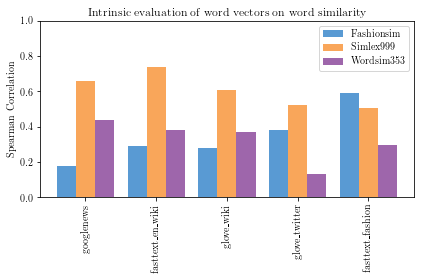

In [230]:
N = len(df1["fashionsim_spearman"].values[0:5])
#N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [4, 9, 2]
yvals = df1["fashionsim_spearman"].values[0:5]
rects1 = ax.bar(ind, yvals, width, color="#599ad3")
zvals = [1,2,3]
zvals = df1["simlex_999_spearman"].values[0:5]
rects2 = ax.bar(ind+width, zvals, width, color='#f9a65a')
kvals = [11,12,13]
kvals = df1["wordsim353_spearman"].values[0:5]
rects3 = ax.bar(ind+width*2, kvals, width, color='#9e66ab')

ax.set_ylabel('Spearman Correlation')
ax.set_xticks(ind+width)
labels = map(lambda x: x.replace("_", "\_"), df1["name"].values)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Fashionsim', 'Simlex999', 'Wordsim353') )
plt.ylim((0,1))
plt.title('Intrinsic evaluation of word vectors on word similarity')
plt.tight_layout()
plt.savefig('intrinsic_comparison_w_pretrained.eps', format='eps', dpi=1000)
plt.show()

In [231]:
ft_skipgram = df.loc[df['algorithm'] == "fasttext"]
ft_skipgram = ft_skipgram.loc[ft_skipgram['data'] == "74million_fashion"]
ft_skipgram = ft_skipgram.loc[ft_skipgram['dimension'] == 300]
ft_skipgram = ft_skipgram.loc[ft_skipgram['model'] == "skipgram"]

ft_cbow = df.loc[df['algorithm'] == "fasttext"]
ft_cbow = ft_cbow.loc[ft_cbow['data'] == "74million_fashion"]
ft_cbow = ft_cbow.loc[ft_cbow['dimension'] == 300]
ft_cbow = ft_cbow.loc[ft_cbow['model'] == "cbow"]

glove = df.loc[df['algorithm'] == "glove"]
glove = glove.loc[glove['dimension'] == 300]
glove = glove.loc[glove['data'] == "74million_fashion"]


word2vec_skipgram = df.loc[df['algorithm'] == "word2vec"]
word2vec_skipgram = word2vec_skipgram.loc[word2vec_skipgram['dimension'] == 300]
word2vec_skipgram = word2vec_skipgram.loc[word2vec_skipgram['model'] == "1"]
word2vec_skipgram = word2vec_skipgram.loc[word2vec_skipgram['data'] == "74million_fashion"]

word2vec_cbow = df.loc[df['algorithm'] == "word2vec"]
word2vec_cbow = word2vec_cbow.loc[word2vec_cbow['dimension'] == 300]
word2vec_cbow = word2vec_cbow.loc[word2vec_cbow['model'] == "0"]
word2vec_cbow = word2vec_cbow.loc[word2vec_cbow['data'] == "74million_fashion"]

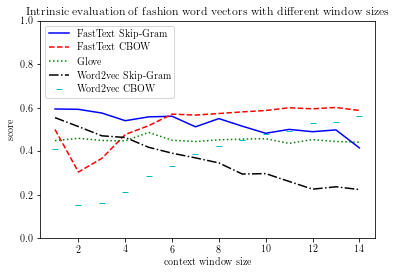

In [232]:
context_size = np.sort(ft_skipgram["context"].values.astype(int))
ft_skipgram_score = []
ft_cbow_score = []
glove_score = []
word2vec_skipgram_score = []
word2vec_cbow_score = []
for val in context_size:
    ft_skipgram_temp = ft_skipgram.loc[ft_skipgram['context'] == str(val)]
    ft_cbow_temp = ft_cbow.loc[ft_cbow['context'] == str(val)]
    glove_temp = glove.loc[glove['context'] == str(val)]
    word2vec_skipgram_temp = word2vec_skipgram.loc[word2vec_skipgram['context'] == str(val)]
    word2vec_cbow_temp = word2vec_cbow.loc[word2vec_cbow['context'] == str(val)]
    ft_skipgram_score.append(ft_skipgram_temp["fashionsim_spearman"].values[0])
    ft_cbow_score.append(ft_cbow_temp["fashionsim_spearman"].values[0])
    glove_score.append(glove_temp["fashionsim_spearman"].values[0])
    word2vec_skipgram_score.append(word2vec_skipgram_temp["fashionsim_spearman"].values[0])
    word2vec_cbow_score.append(word2vec_cbow_temp["fashionsim_spearman"].values[0])

la = plt.plot(context_size,ft_skipgram_score,'b-',label='FastText Skip-Gram')
lb = plt.plot(context_size,ft_cbow_score,'r--',label='FastText CBOW')
lc = plt.plot(context_size,glove_score,'g:',label='Glove')
ld = plt.plot(context_size,word2vec_skipgram_score,'k-.',label='Word2vec Skip-Gram')
le = plt.plot(context_size,word2vec_cbow_score,'c_',label='Word2vec CBOW')
ll = plt.legend(loc='upper left')
lx = plt.xlabel('context window size')
ly = plt.ylabel('score')
plt.ylim((0,1))
plt.title('Intrinsic evaluation of fashion word vectors with different window sizes')
plt.savefig('intrinsic_comparison_hyperparams.eps', format='eps', dpi=1000)
plt.show()

In [255]:
ft_skipgram = df.loc[df['algorithm'] == "fasttext"]
ft_skipgram = ft_skipgram.loc[ft_skipgram['data'] == "74million_fashion"]
ft_skipgram = ft_skipgram.loc[ft_skipgram['context'] == "2"]
ft_skipgram = ft_skipgram.loc[ft_skipgram['model'] == "skipgram"]

In [256]:
ft_skipgram

,analogies_synacc,analogies_semacc,analogies_overallacc,simlex999_pearson,simlex999_pearson_pvalue,simlex_999_spearman,simlex999_spearman_pvalue,simlex999_oov,wordsim353_pearson,wordsim353_pearson_pvalue,...,fashionsim_pearson_pvalue,fashionsim_spearman,fashionsim_spearman_pvalue,fashionsim_oov,dimension,context,model,algorithm,data,name
4,41.793927,24.226254,39.312632,0.479379,9.117858e-21,0.503328,4.805263e-23,4.532578,0.279044,3.361024e-19,...,0.002331,0.592142,0.000357,0.0,300,2,skipgram,fasttext,74million_fashion,fasttext_fashion
74,18.053361,13.927428,17.470606,0.427161,2.226342e-16,0.405324,9.321789e-15,4.532578,0.245098,4.893878e-15,...,0.001123,0.534874,0.001611,0.0,50,2,skipgram,fasttext,74million_fashion,fasttext_fashion_dim50_c2_skipgram
75,31.499035,23.959445,30.434127,0.448476,4.436732e-18,0.433834,6.730561e-17,4.532578,0.291861,6.234100e-21,...,0.002138,0.559894,0.000862,0.0,100,2,skipgram,fasttext,74million_fashion,fasttext_fashion_dim100_c2_skipgram
76,37.344216,28.335112,36.071752,0.423747,4.064254e-16,0.419133,9.070770e-16,4.532578,0.297521,1.002941e-21,...,0.000490,0.610861,0.000205,0.0,150,2,skipgram,fasttext,74million_fashion,fasttext_fashion_dim150_c2_skipgram
77,40.240477,26.093917,38.242388,0.447935,4.916908e-18,0.456358,9.712982e-19,4.532578,0.275524,9.693527e-19,...,0.003292,0.544326,0.001279,0.0,200,2,skipgram,fasttext,74million_fashion,fasttext_fashion_dim200_c2_skipgram
78,42.074776,25.293490,39.704552,0.457987,7.061585e-19,0.464161,2.075932e-19,4.532578,0.285944,4.029937e-20,...,0.001965,0.576203,0.000558,0.0,250,2,skipgram,fasttext,74million_fashion,fasttext_fashion_dim250_c2_skipgram
79,41.302440,21.664888,38.528791,0.474275,2.646715e-20,0.489739,9.915237e-22,4.532578,0.285488,4.645722e-20,...,0.001499,0.580466,0.000496,0.0,350,2,skipgram,fasttext,74million_fashion,fasttext_fashion_dim350_c2_skipgram
80,40.530104,19.530416,37.564064,0.448256,4.626545e-18,0.478816,1.026387e-20,4.532578,0.279998,2.515430e-19,...,0.001119,0.600853,0.000277,0.0,400,2,skipgram,fasttext,74million_fashion,fasttext_fashion_dim400_c2_skipgram
81,39.766544,17.662753,36.644558,0.474896,2.326996e-20,0.503708,4.406750e-23,4.532578,0.273565,1.735856e-18,...,0.001450,0.608266,0.000221,0.0,450,2,skipgram,fasttext,74million_fashion,fasttext_fashion_dim450_c2_skipgram
82,38.897665,16.435432,35.725053,0.463061,2.586886e-19,0.492465,5.460623e-22,4.532578,0.273942,1.552171e-18,...,0.001482,0.605486,0.000241,0.0,500,2,skipgram,fasttext,74million_fashion,fasttext_fashion_dim500_c2_skipgram


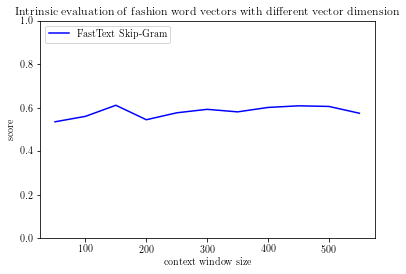

In [260]:
dimension_size = np.sort(ft_skipgram["dimension"].values.astype(int))
ft_skipgram_score = []
#ft_cbow_score = []
#glove_score = []
#word2vec_skipgram_score = []
#word2vec_cbow_score = []
for val in dimension_size:
    ft_skipgram_temp = ft_skipgram.loc[ft_skipgram['dimension'] == val]
    #ft_cbow_temp = ft_cbow.loc[ft_cbow['context'] == str(val)]
    #glove_temp = glove.loc[glove['context'] == str(val)]
    #word2vec_skipgram_temp = word2vec_skipgram.loc[word2vec_skipgram['context'] == str(val)]
    #word2vec_cbow_temp = word2vec_cbow.loc[word2vec_cbow['context'] == str(val)]
    ft_skipgram_score.append(ft_skipgram_temp["fashionsim_spearman"].values[0])
    #ft_cbow_score.append(ft_cbow_temp["fashionsim_spearman"].values[0])
    #glove_score.append(glove_temp["fashionsim_spearman"].values[0])
    #word2vec_skipgram_score.append(word2vec_skipgram_temp["fashionsim_spearman"].values[0])
    #word2vec_cbow_score.append(word2vec_cbow_temp["fashionsim_spearman"].values[0])

la = plt.plot(dimension_size,ft_skipgram_score,'b-',label='FastText Skip-Gram')
#lb = plt.plot(context_size,ft_cbow_score,'r--',label='FastText CBOW')
#lc = plt.plot(context_size,glove_score,'g:',label='Glove')
#ld = plt.plot(context_size,word2vec_skipgram_score,'k-.',label='Word2vec Skip-Gram')
#le = plt.plot(context_size,word2vec_cbow_score,'c_',label='Word2vec CBOW')
ll = plt.legend(loc='upper left')
lx = plt.xlabel('context window size')
ly = plt.ylabel('score')
plt.ylim((0,1))
plt.title('Intrinsic evaluation of fashion word vectors with different vector dimension')
plt.savefig('intrinsic_comparison_dimensions.eps', format='eps', dpi=1000)
plt.show()